The seeds dataset has 210 datapoints, data is in a txt file.Tab is the separator
The data set represents 3 types of wheat - Kama, Rosa and Canadian, 70 elements each.


In [2]:
!pip install tqdm
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from time import time
from math import log
from bic import BIC
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression as lrm

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
#Read the Seeds data file into a DataFrame
SEEDS_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
seeds_df = pd.read_csv(SEEDS_DATA_URL,sep=r"\s+",header=None)

First we will see what the data looks like using the head() and sample() functions

In [4]:
#Visualize the Data
seeds_df.head()
seeds_df.sample(10)

,0,1,2,3,4,5,6,7
109,18.55,16.22,0.8865,6.153,3.674,1.738,5.894,2
123,18.43,15.97,0.9077,5.980,3.771,2.984,5.905,2
24,15.01,14.76,0.8657,5.789,3.245,1.791,5.001,1
181,12.46,13.41,0.8706,5.236,3.017,4.987,5.147,3
85,18.27,16.09,0.8870,6.173,3.651,2.443,6.197,2
136,17.36,15.76,0.8785,6.145,3.574,3.526,5.971,2
134,15.56,14.89,0.8823,5.776,3.408,4.972,5.847,2
75,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,2
91,18.76,16.20,0.8984,6.172,3.796,3.120,6.053,2
88,21.18,17.21,0.8989,6.573,4.033,5.780,6.231,2


In [5]:
#Label the Columns of the dataframe
seeds_df.columns = ("area","perimeter","compactness","length of kernel",
                   "width of kernel","assymetry coefficient","length of kernel groove","target")

In [6]:
#Describe the Seeds Dataframe
seeds_df.describe()


,area,perimeter,compactness,length of kernel,width of kernel,assymetry coefficient,length of kernel groove,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


We visualize the data using pair plots using Seaborn

<Figure size 720x720 with 0 Axes>

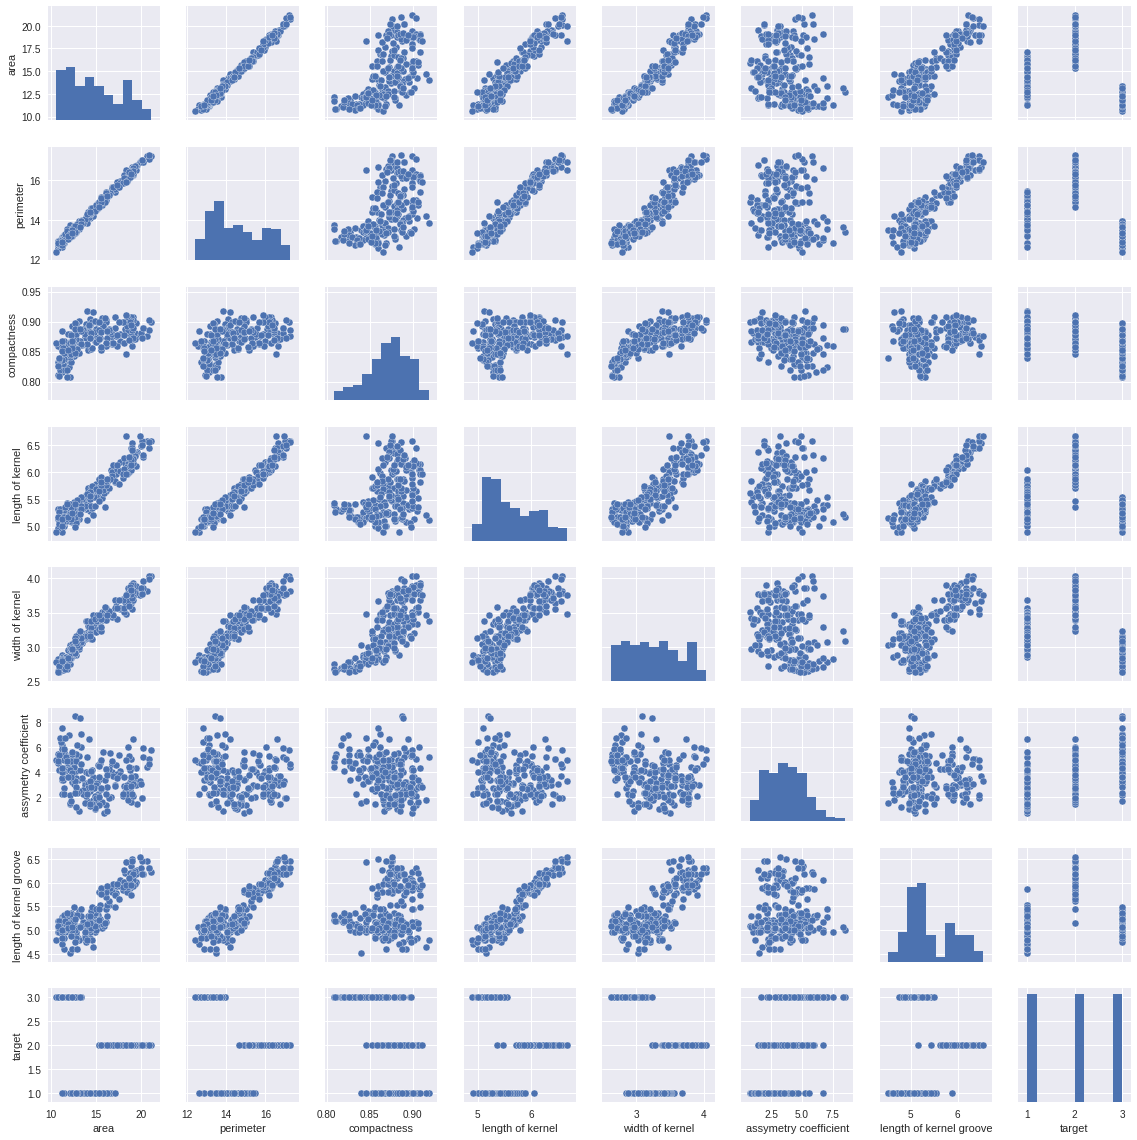

In [7]:
# Visualize the data with pairplots
plt.figure(1, (10,10))
sns.pairplot(seeds_df, size=2, aspect=1)

Melt the Seeds dataframe for visualizing the data with Boxplots

In [68]:
seeds_melt = pd.melt(seeds_df.select_dtypes([float]))


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


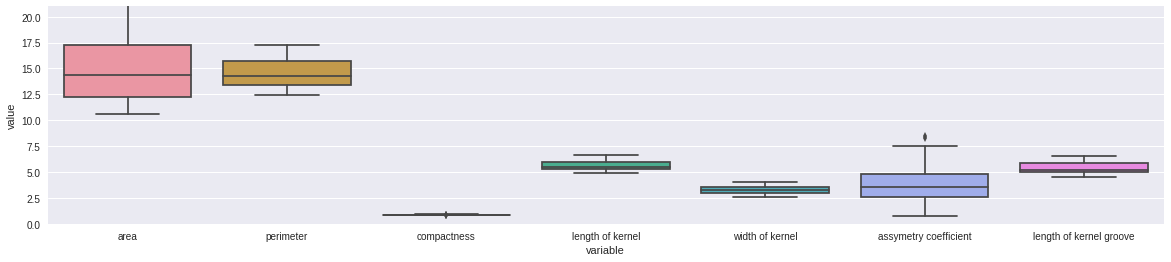

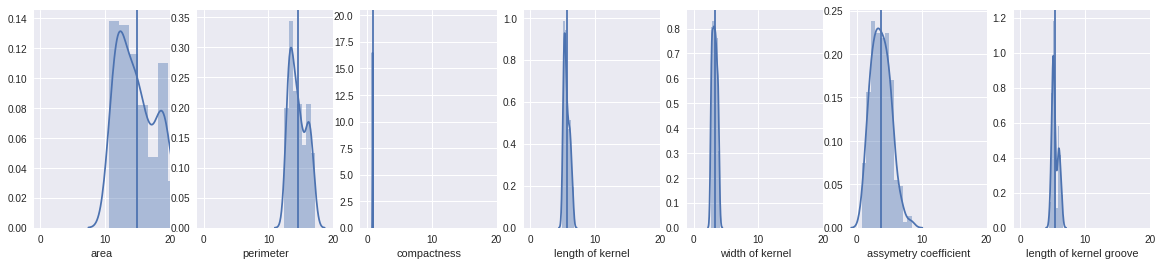

In [67]:
fig = plt.figure(figsize=(20,4))
sns.boxplot(x='variable', y='value', data=seeds_melt)
plt.ylim(0,21)

_, ax = plt.subplots(1,7, figsize=(20,4))
seeds_numerical_df = seeds_df.select_dtypes([float])
for i, feat in enumerate(seeds_numerical_df.columns):
    sns.distplot(seeds_numerical_df[feat], ax=ax[i])
    ax[i].set_xlim(-1,20)
    ax[i].axvline(seeds_numerical_df[feat].mean())

In [42]:
def fit_and_time(model, data):
    start = time()
    model = model.fit(data)
    end = time() - start
    return {'fit_time' : end, 'model' : model}

def process_results(results_list, data):
    df = pd.DataFrame(results_list)
    df['k'] = df.model.apply(lambda x: x.n_clusters)
    df['bic'] = df.model.apply(lambda x: BIC(x, data))
    df['sil_sc'] = df.model.apply(lambda x: silhouette_score(data, x.labels_))
    df.set_index('k', inplace=True)
    return df 

In [43]:
ks = range(2, 70)

kmeans_models = []

X = seeds_df.drop('target', axis=1)

for k in tqdm(ks):
    kmeans_models.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), X))
kmeans_models_df = process_results(kmeans_models, X)

100%|██████████| 68/68 [00:06<00:00,  9.76it/s]


Find the Kmeans, BIC and Silhoutte Scores

In [44]:
kmeans_models_df


,fit_time,model,bic,sil_sc
k,,,,
2,0.017934,"KMeans(algorithm='auto', copy_x=True, init='k-...",3990.746374,0.518287
3,0.020204,"KMeans(algorithm='auto', copy_x=True, init='k-...",3410.982073,0.471934
4,0.024232,"KMeans(algorithm='auto', copy_x=True, init='k-...",3235.769970,0.412528
5,0.026928,"KMeans(algorithm='auto', copy_x=True, init='k-...",3086.546173,0.360295
6,0.034805,"KMeans(algorithm='auto', copy_x=True, init='k-...",2983.775567,0.363544
7,0.037306,"KMeans(algorithm='auto', copy_x=True, init='k-...",2810.806864,0.352465
8,0.040283,"KMeans(algorithm='auto', copy_x=True, init='k-...",2705.654323,0.361295
9,0.042239,"KMeans(algorithm='auto', copy_x=True, init='k-...",2650.957624,0.358464
10,0.049220,"KMeans(algorithm='auto', copy_x=True, init='k-...",2598.607934,0.345586


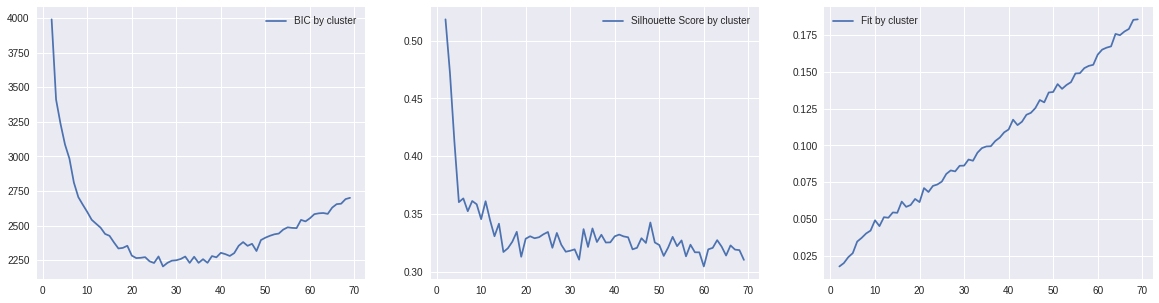

In [45]:
_, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].plot(kmeans_models_df.index, kmeans_models_df.bic, label='BIC by cluster')
ax[0].legend()
ax[1].plot(kmeans_models_df.index, kmeans_models_df.sil_sc, label='Silhouette Score by cluster')
ax[1].legend()
ax[2].plot(kmeans_models_df.index, kmeans_models_df.fit_time, label='Fit by cluster')
ax[2].legend()

The above plots show the BIC scores, Silhouttes Scores by Cluster and Fit by Cluster

In [46]:
X_sc = (X - X.mean())/X.std()

In [47]:
ks = range(2, 70)
kmeans_sc_models = []

X = seeds_df.drop('target', axis=1)

for k in tqdm(ks):
    kmeans_sc_models.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), X_sc))
kmeans_sc_models_df = process_results(kmeans_sc_models, X_sc)

100%|██████████| 68/68 [00:06<00:00,  9.75it/s]


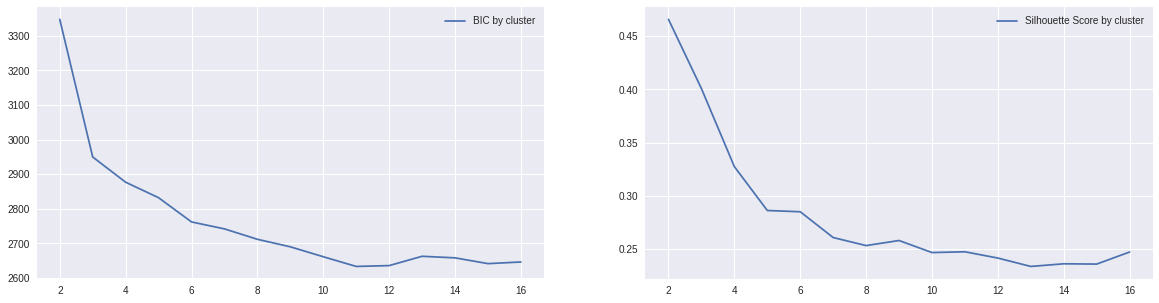

In [48]:
_, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].plot(kmeans_sc_models_df.index[:15], kmeans_sc_models_df.bic[:15], label='BIC by cluster')
ax[0].legend()
ax[1].plot(kmeans_sc_models_df.index[:15], kmeans_sc_models_df.sil_sc[:15], label='Silhouette Score by cluster')
ax[1].legend()

BIC and Silhoutte Scores after Normalizing the data. After normalizing, the elbow shows up and 3 and keeps going lower after that, so we determine 3 is an optimum number of clusters.

In [49]:
kmeans_sc_models_df.model.values[0]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
kmeans_2 = kmeans_sc_models_df.model.values[0]
kmeans_3 = kmeans_sc_models_df.model.values[1]
kmeans_4 = kmeans_sc_models_df.model.values[2]
kmeans_5 = kmeans_sc_models_df.model.values[3]

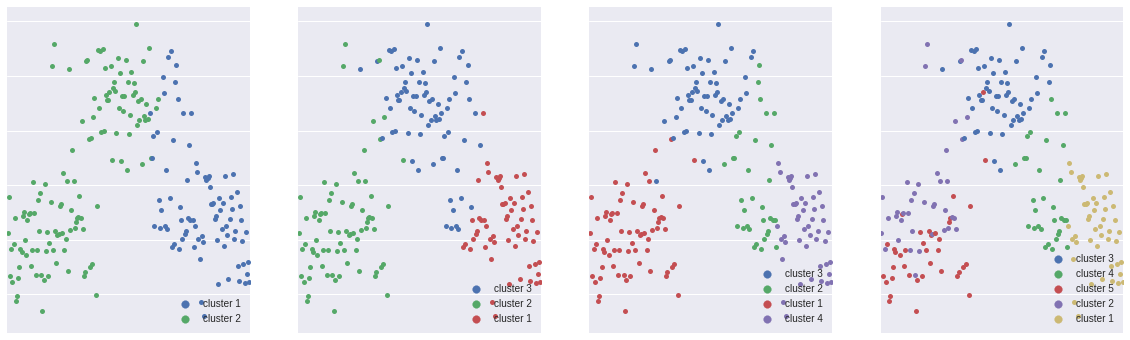

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

number_of_dimensions = 2
pca = PCA(number_of_dimensions)

features_scaled = StandardScaler().fit_transform(seeds_df)
seeds_2d = pca.fit_transform(features_scaled)
from sklearn.cluster import KMeans

number_of_clusters = [2,3,4,5]

_, ax = plt.subplots(1,4, figsize=(20,6))

for i, clusters in enumerate(number_of_clusters):
   kmeans = KMeans(n_clusters=clusters)
   kmeans.fit(seeds_df)
   labels = ['cluster ' + str(label+1) for label in kmeans.labels_]
   sns.swarmplot(x=seeds_2d[:,0], y=seeds_2d[:,1], hue=labels, ax=ax[i])
   ax[i].set_xticklabels([])
   ax[i].set_yticklabels([])
   ax[i].legend(loc='lower right')

No handles with labels found to put in legend.


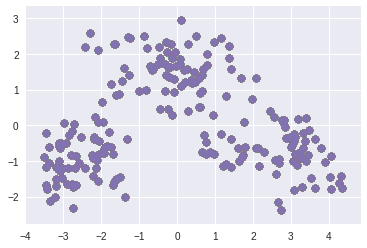

In [69]:
seeds_df

,area,perimeter,compactness,length of kernel,width of kernel,assymetry coefficient,length of kernel groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1
